In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SCP)
    library(SeuratDisk)
    #library(SeuratData)
    library(patchwork)
    library(ggplot2)
    library(cowplot)
    #theme_set(theme_cowplot())
    library(Matrix)
    #library(SeuratWrappers)
    library(dplyr)
    #library(reticulate)
    #library(MAST)
    #library(velocyto.R)
    #library(monocle3)
    #library(magrittr)
    library(RColorBrewer)
    library(dittoSeq)
    library("clusterProfiler")
    library("org.Hs.eg.db")
    library("AnnotationHub")
})
options(warn=-1)

set.seed(23)

setwd("/work3/SingleCell/Arima")
options(stringsAsFactors = F)
source("src/functions_nagai.R")

## First integrate Arima and GA organoid

In [3]:
ari_org_integrated <- readRDS("data/ari_org/ari_org_integrated.rds")

In [ ]:
ari_org_integrated$project <- "ari_org"
ari_org_integrated$celltype <- ari_org_integrated$clusters
ari_org_integrated

In [60]:
table(ari_org_integrated$integrated_snn_res.0.7)
ari_org_integrated$clusters <- ari_org_integrated$integrated_snn_res.0.7
Idents(object = ari_org_integrated) <- ari_org_integrated$clusters


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3756 2389 1931 1657 1654 1387 1262  816  779  614  426  336  253  209   68 

In [61]:
color_palette1 <- brewer.pal(8, "Dark2")
color_palette2 <- brewer.pal(12, "Paired")
color_palette <- c(color_palette1, color_palette2)
color_palette
length(color_palette)

final_color_palette <- c('#1B9E77','#D95F02','#7570B3',
                         '#E7298A','#66A61E','#E6AB02',
                         '#A6761D','#666666','#A6CEE3',
                         '#1F78B4','#B2DF8A','#33A02C',
                         '#FB9A99','#E31A1C','#FDBF6F',
                         '#FF7F00','#CAB2D6','#6A3D9A',
                         '#FFFF99','#B15928')

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
 [8] "#666666" "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C"
[15] "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

[1] 20

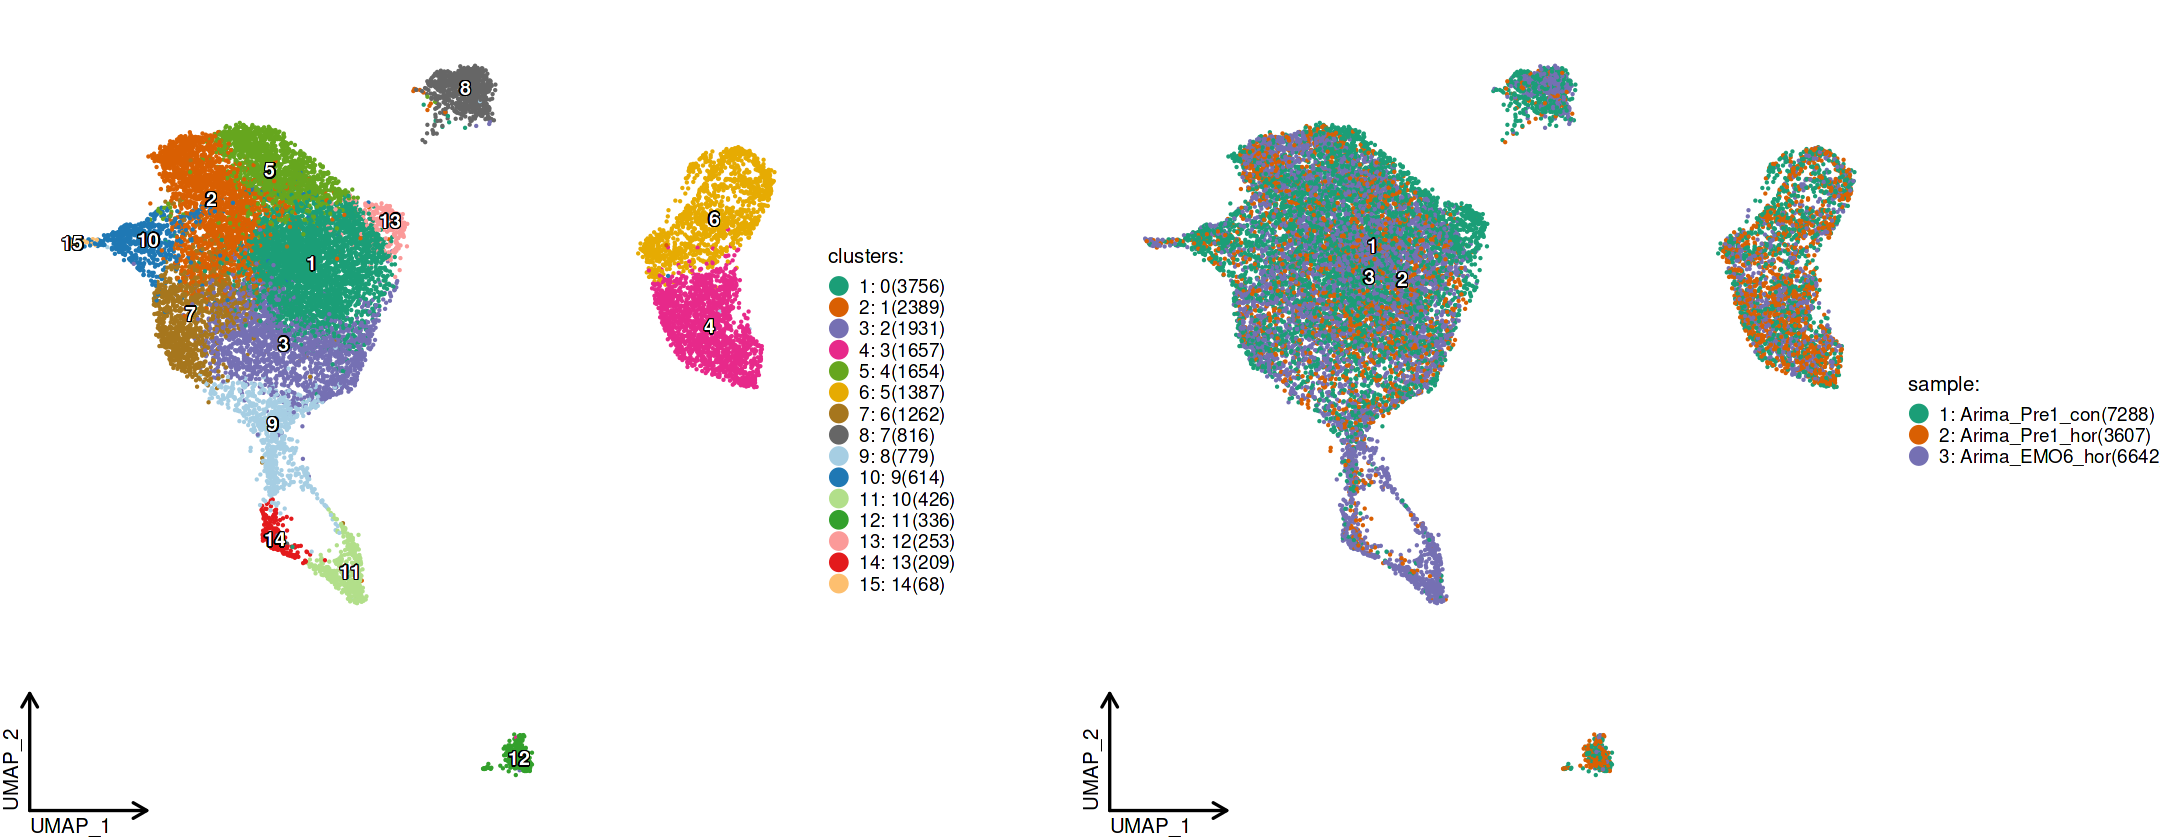

In [62]:
# Using SCP
plot.width = 18
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ClassDimPlot(palcolor = final_color_palette, label = TRUE,
  srt = ari_org_integrated, group.by = c("clusters", "sample"),
  reduction = "UMAP", theme_use = "theme_blank"
)
ggsave(file="results/2023-04-28/Fig3_F.pdf", width = plot.width, height = plot.height)

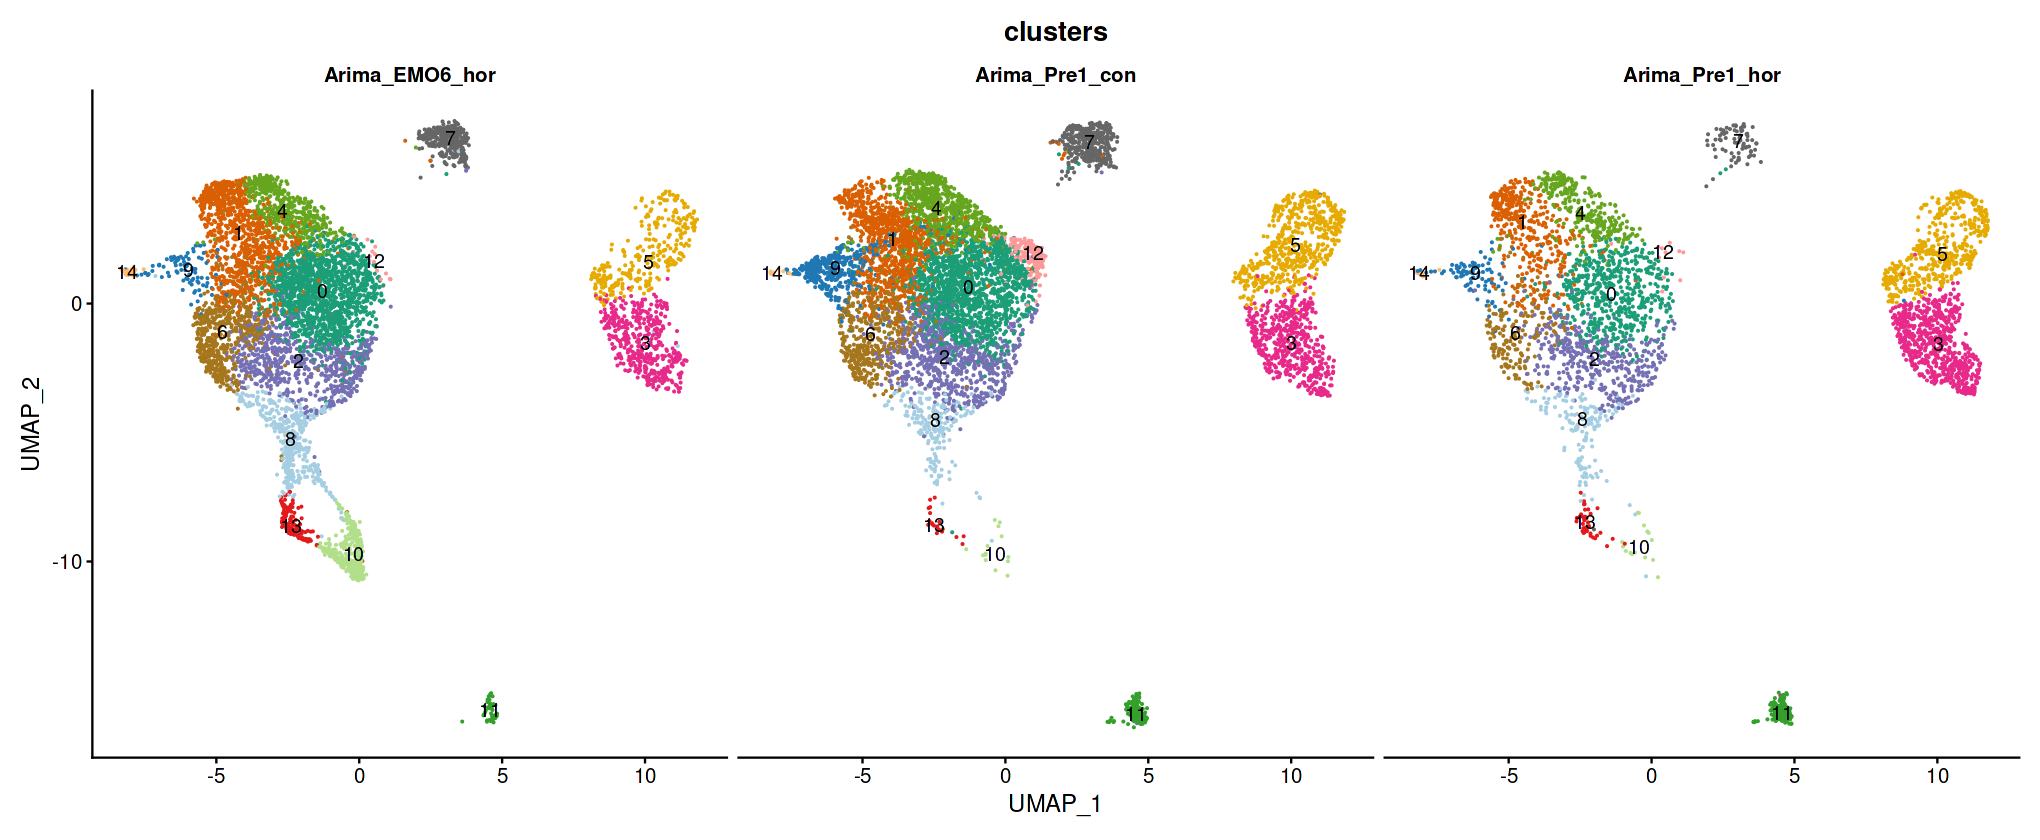

In [63]:
plot.width = 17
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(ari_org_integrated, reduction = "umap", group.by = "clusters", 
        split.by = "sample", label = TRUE, cols = final_color_palette) + NoLegend()
ggsave(file="results/2023-04_RNA_velocity/ari_org_umap_without_names.pdf", width = plot.width, height = plot.height)

In [64]:
new.cluster.ids <- c("NH", #0
                     "LGR5+", #1
                     "Surface", #2
                     "Stromal", #3
                     "Glandular", #4
                     "PV-like", #5
                     "Luminal", #6
                     "Proliferative", #7
                     "Surface", #8
                     "Ciliated", #9
                     "10", #10
                     "Endo", #11
                     "NH", #12
                     "13", #13
                     "Ciliated" #14
)
names(new.cluster.ids) <- levels(ari_org_integrated)
ari_org_integrated <- RenameIdents(ari_org_integrated, new.cluster.ids)

In [65]:
# confirm if get the names
table(Idents(ari_org_integrated))


           NH         LGR5+       Surface       Stromal     Glandular 
         4009          2389          2710          1657          1654 
      PV-like       Luminal Proliferative      Ciliated            10 
         1387          1262           816           682           426 
         Endo            13 
          336           209 

In [66]:
ari_org_integrated$celltype <- Idents(ari_org_integrated)

In [67]:
table(ari_org_integrated$celltype)


           NH         LGR5+       Surface       Stromal     Glandular 
         4009          2389          2710          1657          1654 
      PV-like       Luminal Proliferative      Ciliated            10 
         1387          1262           816           682           426 
         Endo            13 
          336           209 

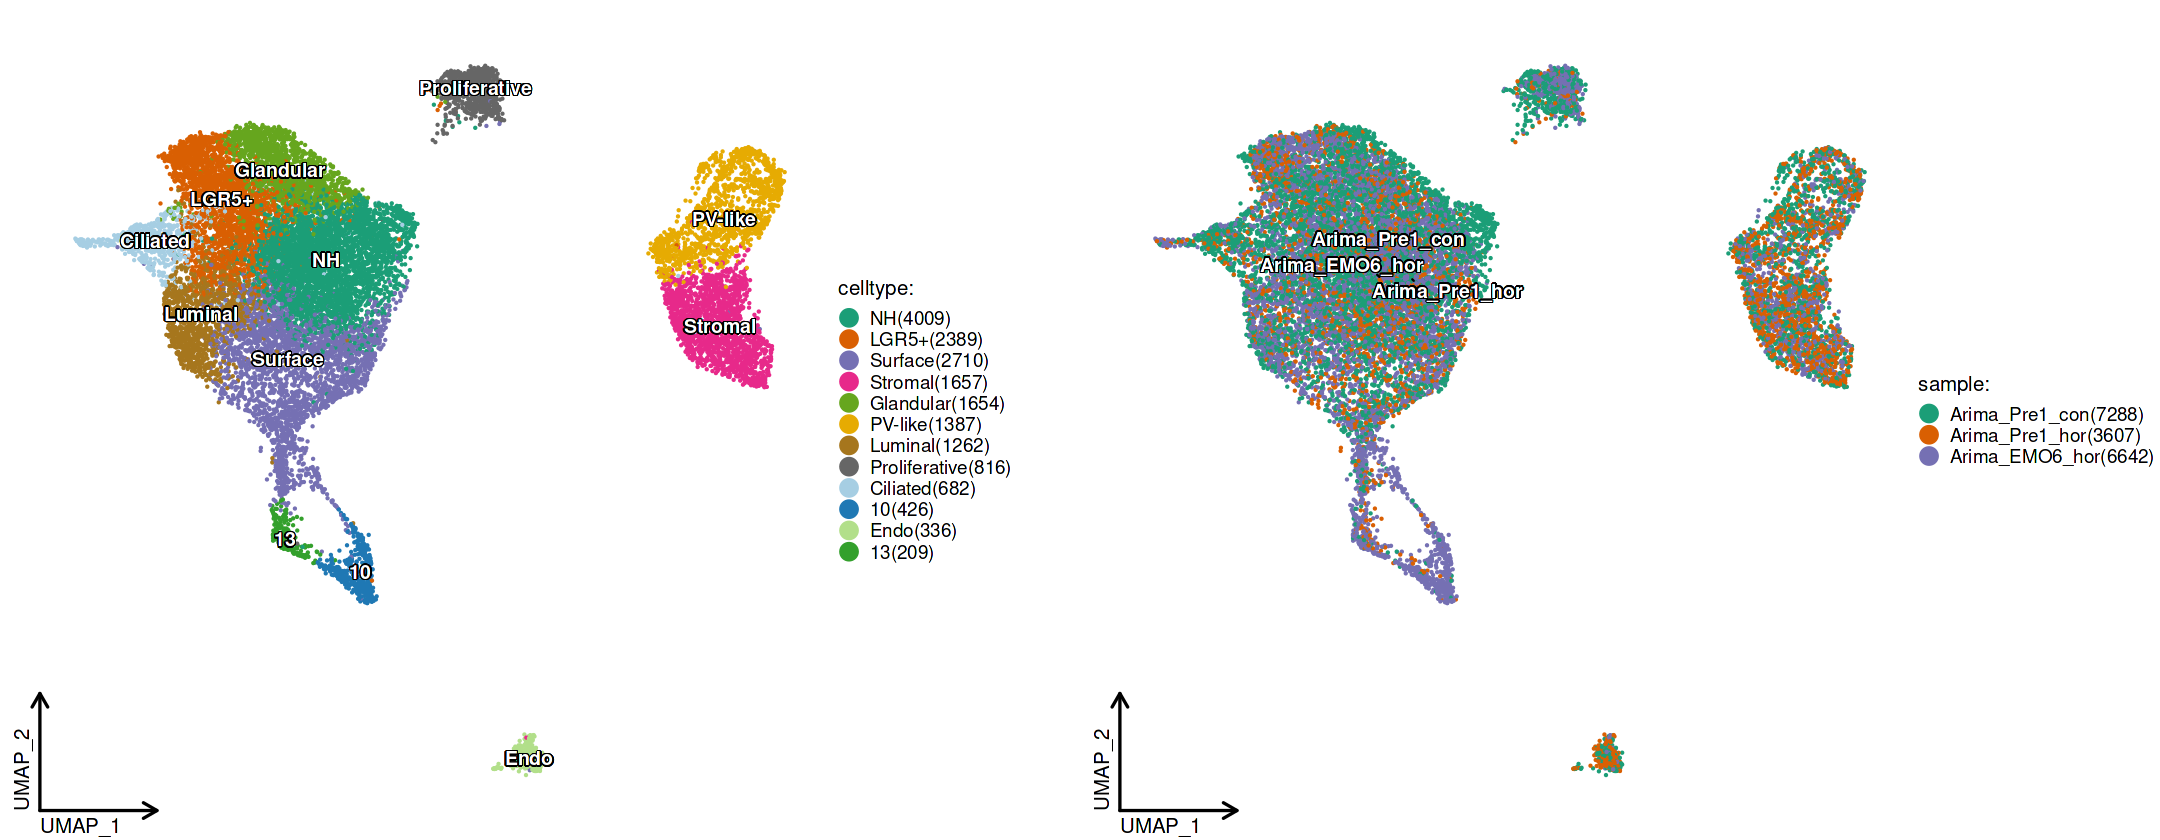

In [69]:
# Using SCP
plot.width = 18
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ClassDimPlot(label_insitu = TRUE, label = TRUE, 
  srt = ari_org_integrated, group.by = c("celltype", "sample"),
  reduction = "UMAP", theme_use = "theme_blank", palcolor = final_color_palette
)
ggsave(file="results/2023-04-26/ari_org_umap_1.pdf", width = plot.width, height = plot.height)

In [ ]:
final_color_palette={"Ciliated": "#A6CEE3",
                     "Stromal": "#E7298A",
                     "LGR5+":"#D95F02",
                     "Luminal": "#A6761D",
                     "NH": "#1B9E77",
                     "Glandular": "#66A61E",
                     "Surface": "#7570B3",
                     "PV-like": "#E6AB02",
                     "Proliferative": "#666666",
                     "Endo": "#B2DF8A",
                     "13": "#33A02C",
                     "10": "#1F78B4"}

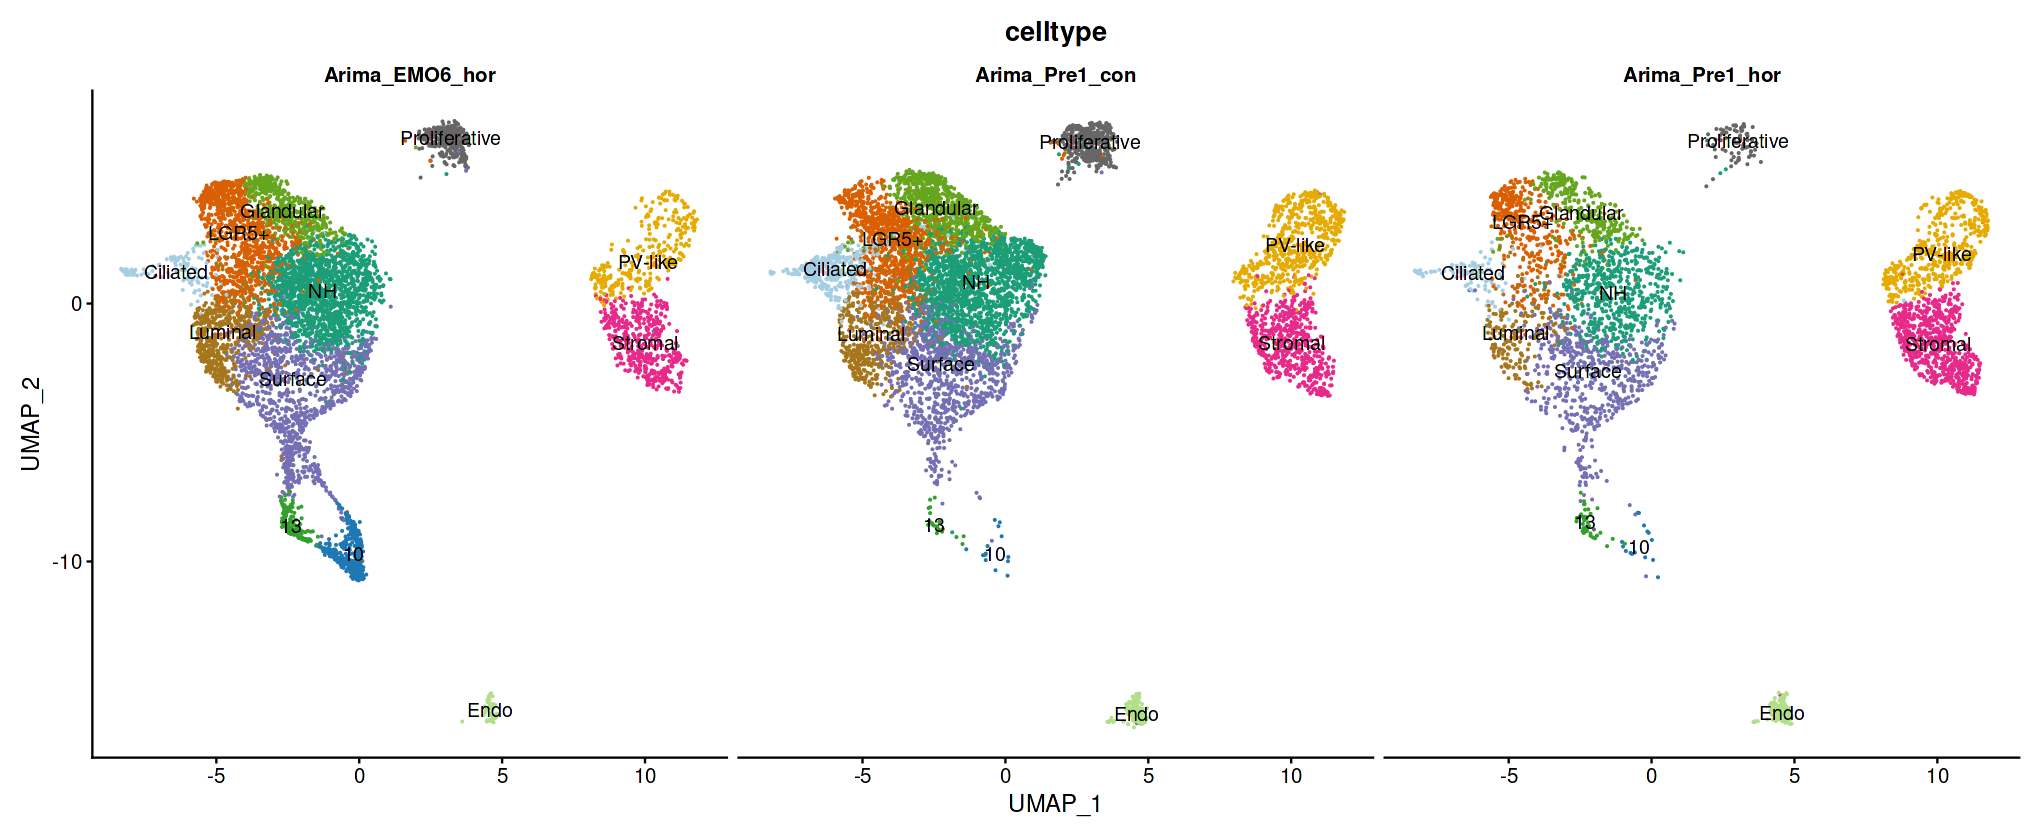

In [70]:
plot.width = 17
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(ari_org_integrated, group.by = "celltype", reduction = "umap", 
        split.by = "sample", label = TRUE, cols = final_color_palette) + NoLegend()
ggsave(file="results/2023-04-28/ari_org_umap_2.pdf", width = plot.width, height = plot.height)

In [71]:
# Reference: 
markers = c("EPCAM", "SOX9", "MMP7",             #SOX9
            "LGR5", "PTGS1",                     #Lumenal
            "SCGB2A2", "SLC18A2", "PAEP",        #Glandular
            "FOXJ1", "PIFO",                     #Ciliated
            "ACTA2", "MYH11", "LEFTY2", "ACTG2", #uSMC
            "RGS5", "NTRK2", "FHL5",             #PV MYH11
            "GUCY1A2", "STEAP4", "IGF1", "PCOLCE", #PV STEAP4
            "C7", "OGN",                         #Fibroblast C7
            "MMP11", "SFRP1",                    #eS
            "DKK1", "FOXO1",                     #dS
            "CD34", "SEMA3G", "GJA5",            #Endothelial artery
            "ACKR1", "PLVAP",                    #Endothelial vein
            "PTPRC", "CD3G", "NCAM1",             #Lymphoid
            "CD14", "CSF1R")                     #Myeloid

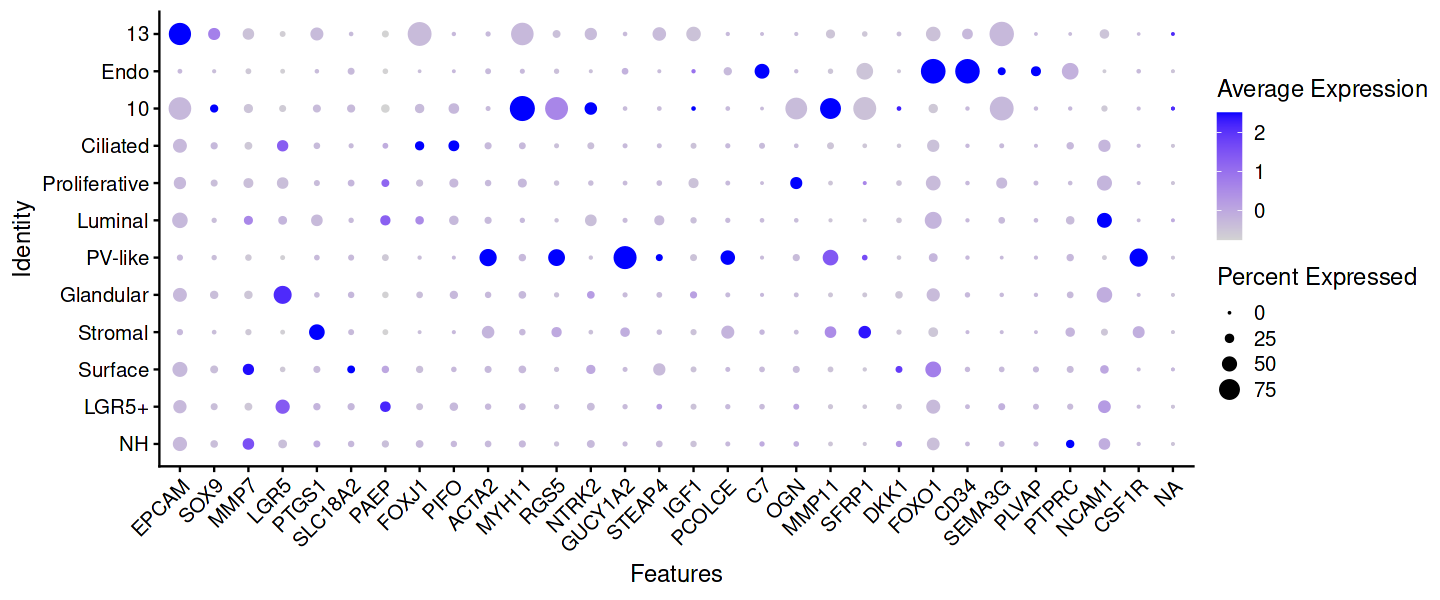

In [72]:
plot.width = 12
plot.height = 5
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DotPlot(ari_org_integrated, features = markers) + RotatedAxis()
ggsave(file="results/2023-04-28/ari_org_dotplot_by_clusters_named.pdf", width = plot.width, height = plot.height)

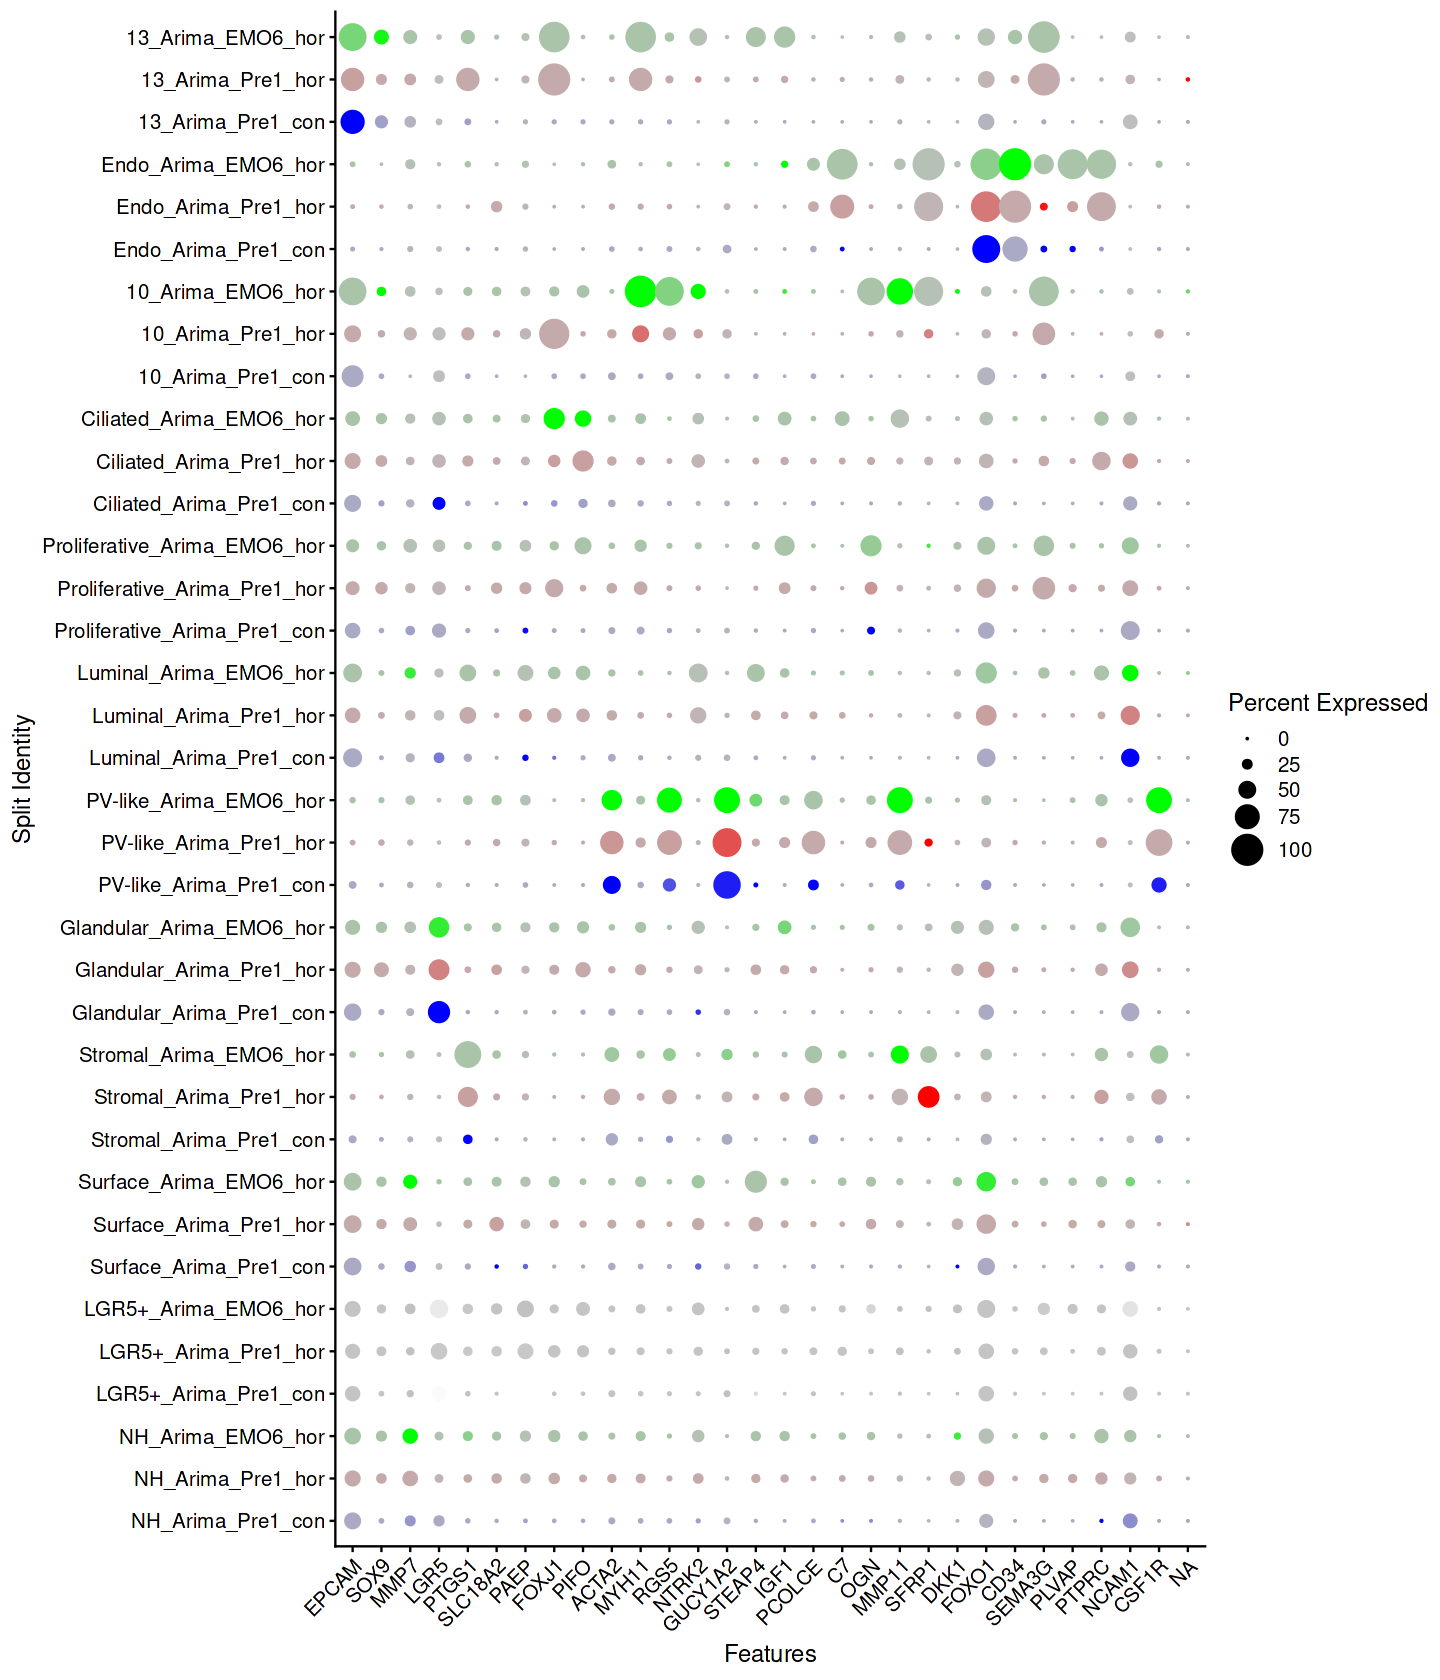

In [73]:
# Dot plots - the size of the dot corresponds to the percentage of cells expressing the
# feature in each cluster. The color represents the average expression level
plot.width = 12
plot.height = 14
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DotPlot(ari_org_integrated, features = markers, cols = c("blue", "red", "green"), dot.scale = 8, split.by = "sample") +
    RotatedAxis()
ggsave(file="results/2023-04-28/ari_org_dotplot_by_sample_named.pdf", width = plot.width, height = plot.height)

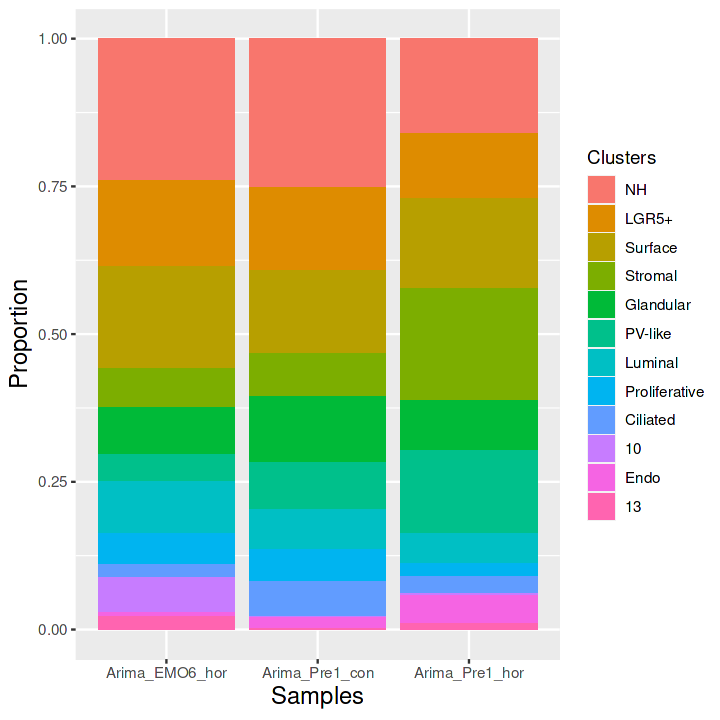

In [74]:
tab = prop.table(table(Idents(ari_org_integrated), ari_org_integrated$sample), margin = 2)
tab = as.data.frame(tab)

plot.width = 6
plot.height = 6
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ggplot(tab,aes(x=Var2,y=Freq,fill=Var1)) + geom_col() +  
    theme(
        plot.title = element_text(size=14), 
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
    ) +
    xlab("Samples") + ylab("Proportion") + labs(fill = "Clusters")
ggsave(file="results/2023-04-28/ari_org_prop_samples_named.pdf", width = plot.width, height = plot.height)

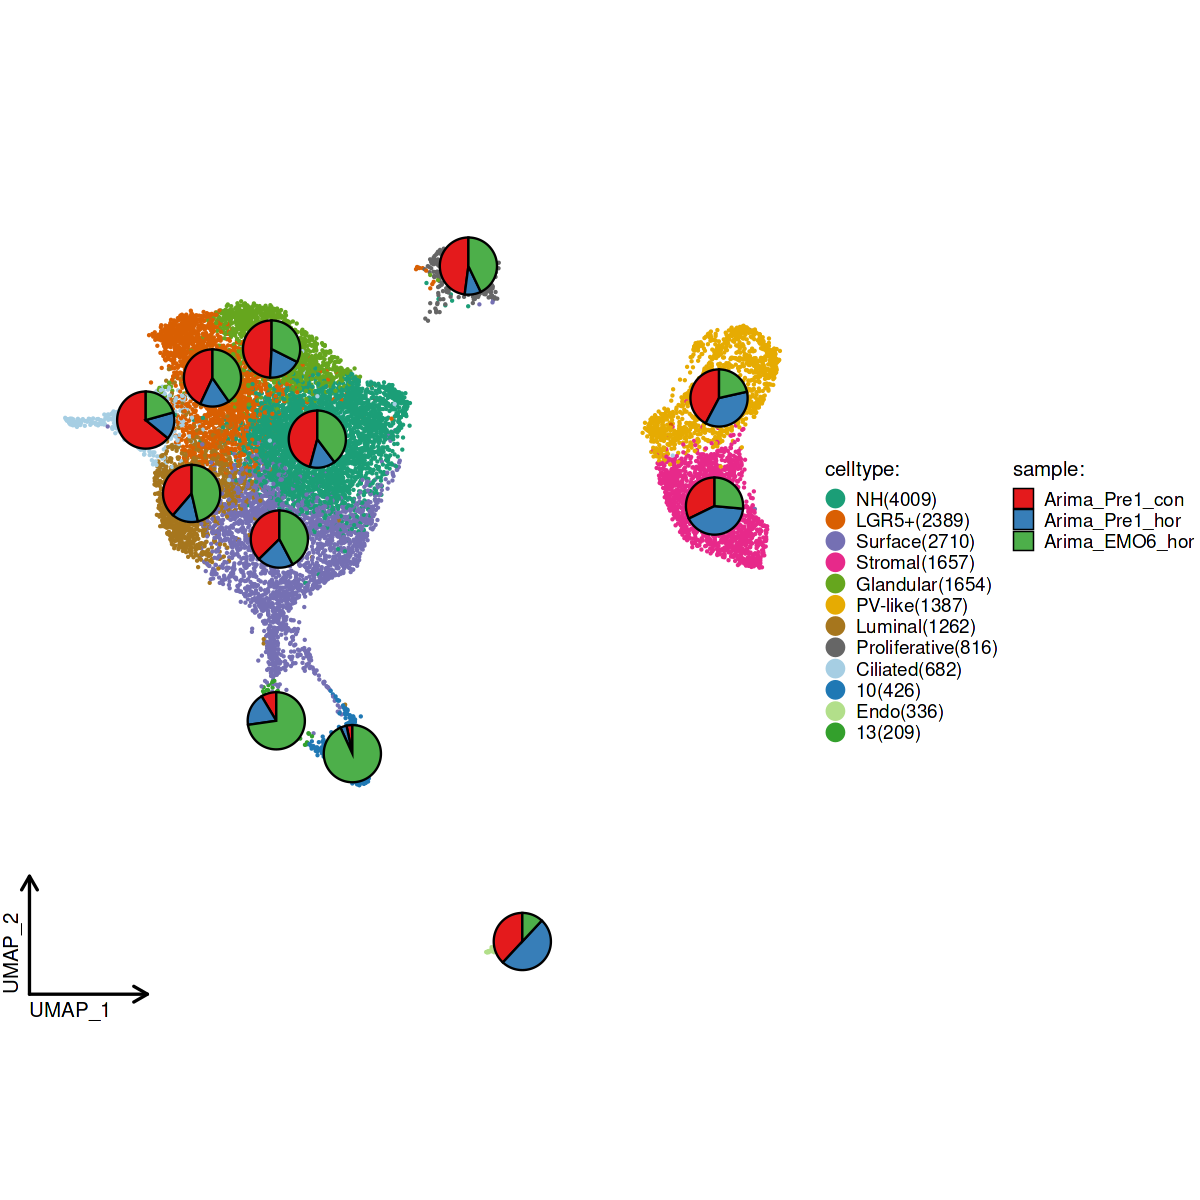

In [87]:
plot.width = 10
plot.height = 10
options(repr.plot.width = plot.width, repr.plot.height = plot.height)

# Using SCP
ClassDimPlot(
  srt = ari_org_integrated, group.by = "celltype", stat.by = "sample",
  reduction = "UMAP", theme_use = "theme_blank", palcolor = final_color_palette
)
ggsave(file="results/2023-04-28/ari_org_umap_3_proportion_samples.pdf", width = plot.width, height = plot.height)

In [88]:
saveRDS(ari_org_integrated, file = "data/ari_org/ari_org_annotated.rds")

# DEG identification amongst the samples (ALL CELLS)

Here we use pairwise comparison between samples:

1. Pre1: control and hormone
2. Pre1_hormone and EMO6_hormone
3. Pre1_control and Pre1_hor + EMO6_hor

In [ ]:
ari_org_integrated <- readRDS("data/ari_org/ari_org_annotated.rds")

In [76]:
table(ari_org_integrated$celltype)


           NH         LGR5+       Surface       Stromal     Glandular 
         4009          2389          2710          1657          1654 
      PV-like       Luminal Proliferative      Ciliated            10 
         1387          1262           816           682           426 
         Endo            13 
          336           209 

### Identification of canonical cell markers across conditions

In [78]:
# Cluster10 across samples
DefaultAssay(ari_org_integrated) <- "RNA"
c10.markers <- FindConservedMarkers(ari_org_integrated, ident.1 = "10", grouping.var = "sample", verbose = FALSE)
c10.markers$genes <- rownames(c10.markers)

write.table(as.matrix(c10.markers), 
            'results/2023-04-28/c10.conserved_markers.tsv', 
            sep = '\t', row.names = F, col.names = T, quote = F)

head(c10.markers)

Arima_Pre1_hor_p_val Arima_Pre1_hor_avg_log2FC Arima_Pre1_hor_pct.1
HSPA6      0.000000e+00        2.1777635                 0.667               
CRYAB     2.952866e-103        1.1298925                 0.467               
HSPA1A     4.558744e-77        2.8201525                 0.667               
HSPA1B     3.073095e-73        1.6835248                 0.600               
DNAJB1     1.496333e-18        2.4427598                 0.600               
LINC00324  1.950639e-09        0.3203013                 0.200               
          Arima_Pre1_hor_pct.2 Arima_Pre1_hor_p_val_adj Arima_EMO6_hor_p_val
HSPA6     0.002                0.000000e+00             0                   
CRYAB     0.005                8.682607e-99             0                   
HSPA1A    0.016                1.340453e-72             0                   
HSPA1B    0.014                9.036128e-69             0                   
DNAJB1    0.065                4.399817e-14             0                   
LINC00324 0.014                5.735658e-05             0                   
          Arima_EMO6_hor_avg_log2FC Arima_EMO6_hor_pct.1 Arima_EMO6_hor_pct.2
HSPA6     2.365513                  0.725                0.057               
CRYAB     1.158079                  0.491                0.021               
HSPA1A    2.002735                  0.771                0.069               
HSPA1B    1.852260                  0.778                0.057               
DNAJB1    2.389020                  0.899                0.118               
LINC00324 1.524665                  0.469                0.024               
          Arima_EMO6_hor_p_val_adj Arima_Pre1_con_p_val
HSPA6     0                         0.000000e+00       
CRYAB     0                         1.112482e-83       
HSPA1A    0                        5.208022e-118       
HSPA1B    0                        3.786135e-133       
DNAJB1    0                         7.172382e-33       
LINC00324 0                         2.133352e-15       
          Arima_Pre1_con_avg_log2FC Arima_Pre1_con_pct.1 Arima_Pre1_con_pct.2
HSPA6     1.4381945                 0.500                0.002               
CRYAB     0.5084378                 0.357                0.004               
HSPA1A    2.0569598                 0.714                0.012               
HSPA1B    0.8808401                 0.643                0.008               
DNAJB1    1.6556004                 0.786                0.058               
LINC00324 0.7637904                 0.214                0.009               
          Arima_Pre1_con_p_val_adj max_pval     minimump_p_val genes    
HSPA6      0.000000e+00            0.000000e+00 0              HSPA6    
CRYAB      3.271141e-79            1.112482e-83 0              CRYAB    
HSPA1A    1.531367e-113            4.558744e-77 0              HSPA1A   
HSPA1B    1.113275e-128            3.073095e-73 0              HSPA1B   
DNAJB1     2.108967e-28            1.496333e-18 0              DNAJB1   
LINC00324  6.272909e-11            1.950639e-09 0              LINC00324

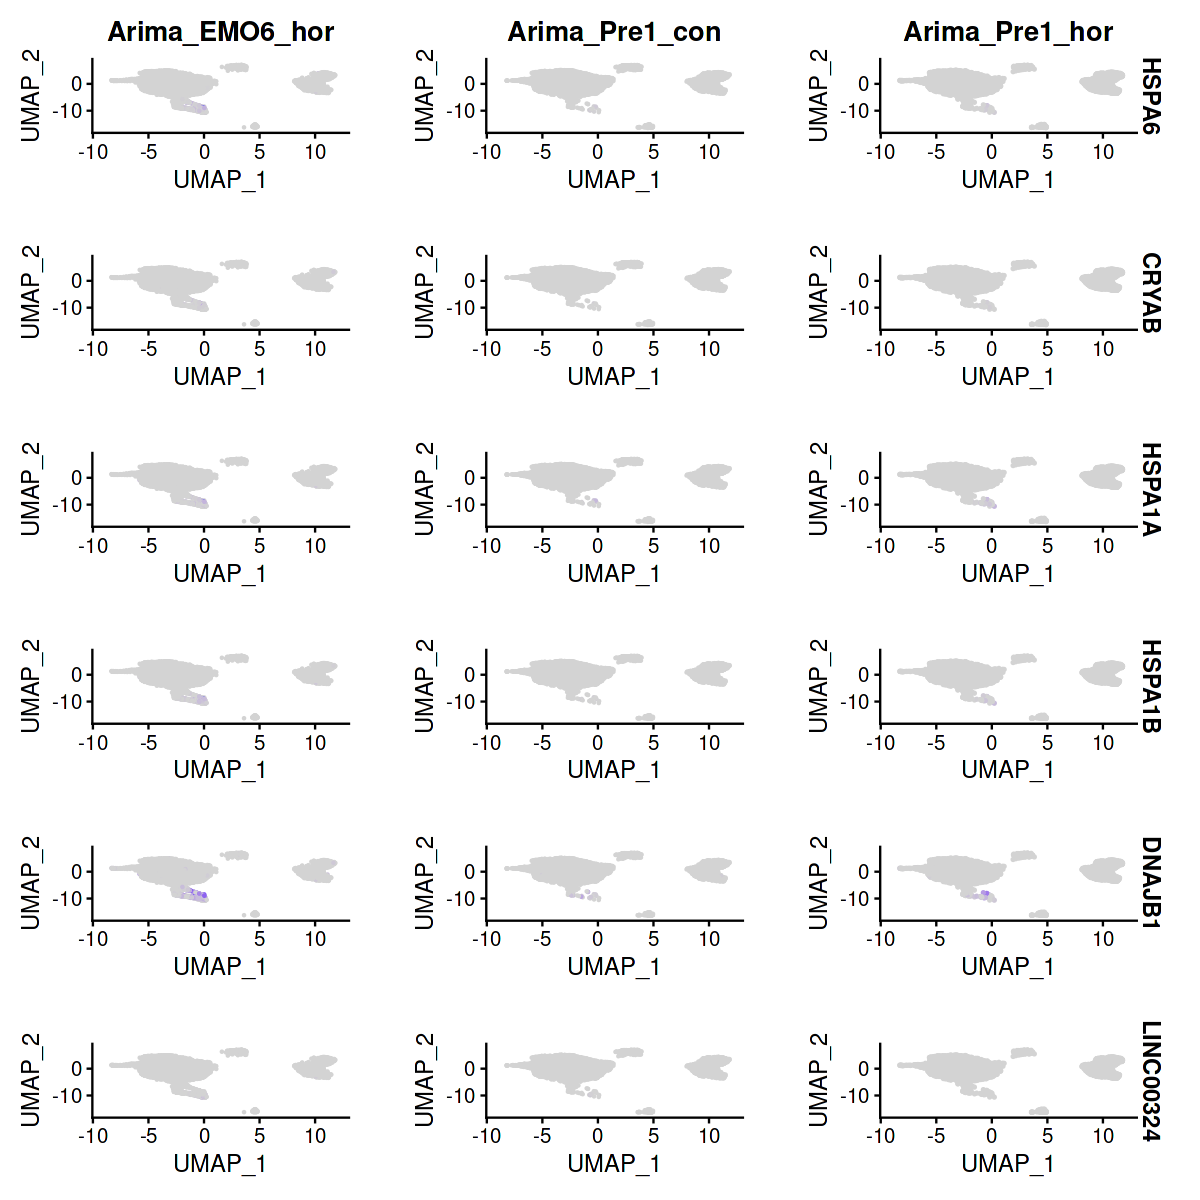

In [79]:
genes_to_plot <- head(c10.markers$genes)
FeaturePlot(ari_org_integrated, features = genes_to_plot, split.by = "sample", min.cutoff = "q9")

In [80]:
# Cluster13 across samples
DefaultAssay(ari_org_integrated) <- "RNA"
c13.markers <- FindConservedMarkers(ari_org_integrated, ident.1 = "13", grouping.var = "sample", verbose = FALSE)
c13.markers$genes <- rownames(c13.markers)

write.table(as.matrix(c13.markers), 
            'results/2023-04-28/c13.conserved_markers.tsv', 
            sep = '\t', row.names = F, col.names = T, quote = F)

head(c13.markers)

Arima_Pre1_hor_p_val Arima_Pre1_hor_avg_log2FC Arima_Pre1_hor_pct.1
ANKRD37 2.368131e-90         2.6040881                 0.744               
BHLHE40 7.099389e-36         2.0108082                 0.769               
UQCRB   2.967008e-16         0.9207999                 0.410               
ADM     7.216546e-19         1.3886829                 0.538               
MIF     1.413790e-32         1.9260510                 0.769               
NACA    2.308154e-32         2.1064154                 0.897               
        Arima_Pre1_hor_pct.2 Arima_Pre1_hor_p_val_adj Arima_EMO6_hor_p_val
ANKRD37 0.045                6.963251e-86             5.560127e-150       
BHLHE40 0.137                2.087504e-31             6.889711e-123       
UQCRB   0.073                8.724191e-12             1.352354e-119       
ADM     0.114                2.121953e-14             3.433844e-109       
MIF     0.150                4.157108e-28             1.136069e-106       
NACA    0.247                6.786895e-28             1.583132e-104       
        Arima_EMO6_hor_avg_log2FC Arima_EMO6_hor_pct.1 Arima_EMO6_hor_pct.2
ANKRD37 2.408740                  0.868                0.148               
BHLHE40 2.036137                  0.914                0.223               
UQCRB   1.369798                  0.757                0.133               
ADM     1.674390                  0.789                0.160               
MIF     2.769368                  0.974                0.375               
NACA    2.297521                  0.954                0.350               
        Arima_EMO6_hor_p_val_adj Arima_Pre1_con_p_val Arima_Pre1_con_avg_log2FC
ANKRD37 1.634900e-145            7.485007e-95         3.023929                 
BHLHE40 2.025851e-118            6.421080e-33         1.760105                 
UQCRB   3.976462e-115            2.186561e-08         0.511081                 
ADM     1.009687e-104            1.942198e-42         1.572960                 
MIF     3.340496e-102            6.284708e-30         1.791627                 
NACA    4.655040e-100            1.905648e-11         1.113011                 
        Arima_Pre1_con_pct.1 Arima_Pre1_con_pct.2 Arima_Pre1_con_p_val_adj
ANKRD37 0.833                0.028                2.200891e-90            
BHLHE40 0.833                0.086                1.888054e-28            
UQCRB   0.333                0.050                6.429364e-04            
ADM     0.778                0.056                5.710839e-38            
MIF     0.778                0.083                1.847956e-25            
NACA    0.778                0.202                5.603369e-07            
        max_pval     minimump_p_val genes  
ANKRD37 2.368131e-90 1.668038e-149  ANKRD37
BHLHE40 6.421080e-33 2.066913e-122  BHLHE40
UQCRB   2.186561e-08 4.057063e-119  UQCRB  
ADM     7.216546e-19 1.030153e-108  ADM    
MIF     6.284708e-30 3.408206e-106  MIF    
NACA    1.905648e-11 4.749395e-104  NACA

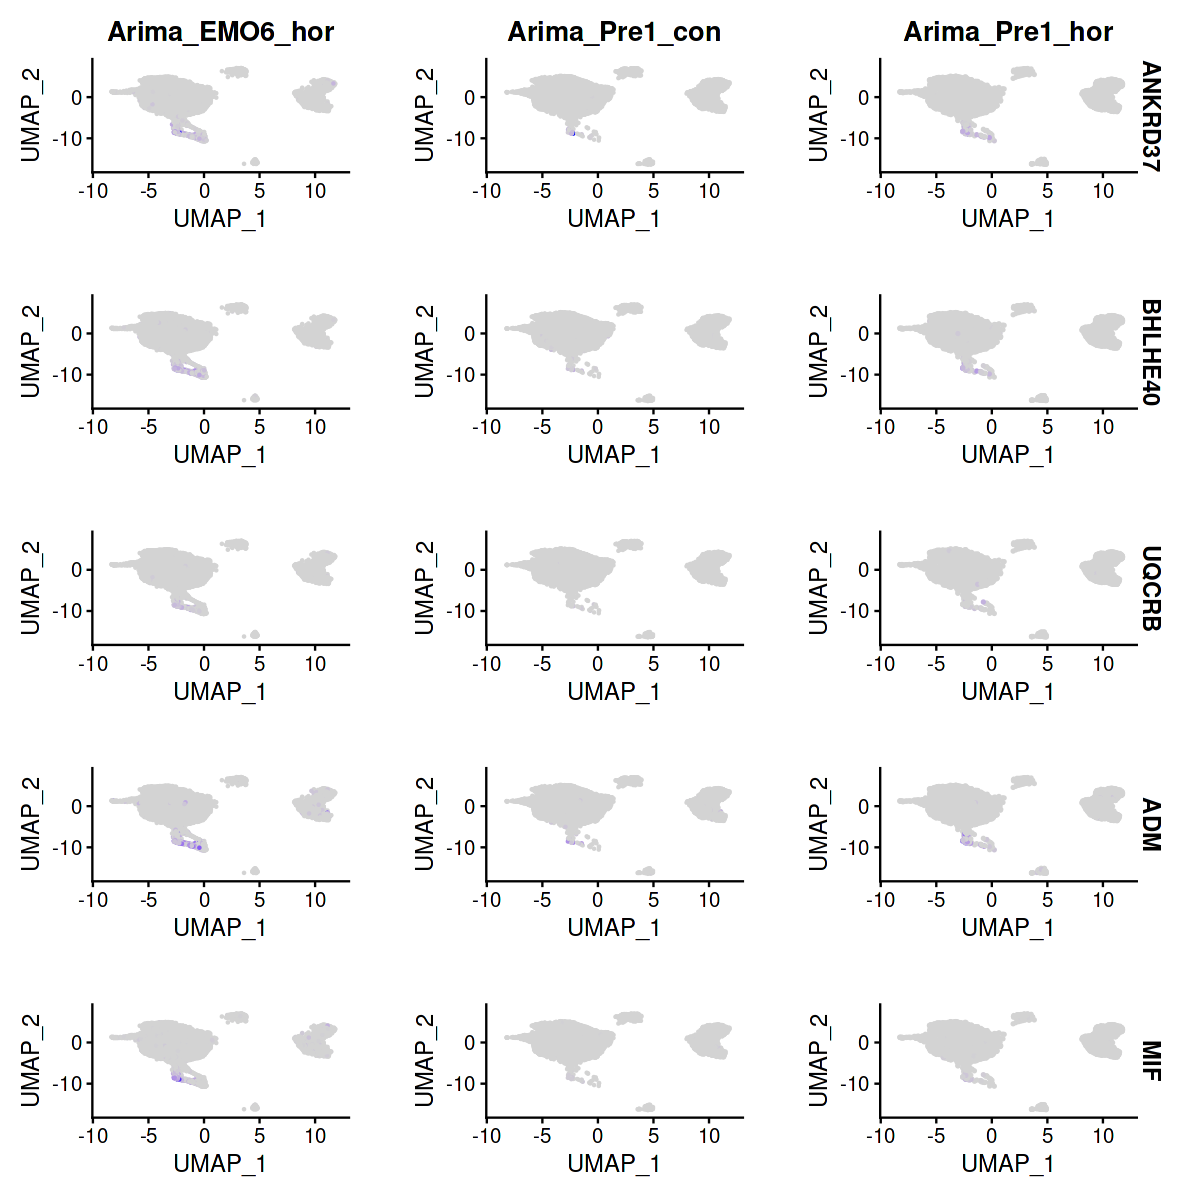

In [83]:
genes_to_plot <- head(c13.markers$genes,5)
FeaturePlot(ari_org_integrated, features = genes_to_plot, split.by = "sample", min.cutoff = "q9")

In [84]:
Idents(object = ari_org_integrated) <- ari_org_integrated$project

In [85]:
DefaultAssay(ari_org_integrated) <- "SCT"

In [86]:
ari_org_integrated <- PrepSCTFindMarkers(ari_org_integrated)

Found 3 SCT models. Recorrecting SCT counts using minimum median counts: 6592



In [89]:
# DEG all clusters
Idents(object = ari_org_integrated) <- ari_org_integrated$celltype
ari.markers <- FindAllMarkers(ari_org_integrated, assay = "SCT", min.pct = 0.25, logfc.threshold = 0.25,
                                verbose = FALSE)

In [92]:
# For each cluster make this plot

ari.markers %>%
    group_by(cluster) %>%
    slice_max(n = 5, order_by = avg_log2FC)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster       gene      
1  2.233726e-301 1.2329816  0.685 0.427 6.150118e-297 NH            LINC02582 
2   0.000000e+00 1.1495809  0.844 0.552  0.000000e+00 NH            CFTR      
3   0.000000e+00 1.1050171  0.977 0.800  0.000000e+00 NH            GDA       
4   3.370811e-95 1.1050132  0.503 0.356  9.280854e-91 NH            XACT      
5   0.000000e+00 0.9633557  0.912 0.683  0.000000e+00 NH            SEMA3C    
6  1.685598e-270 1.2904524  0.946 0.752 4.640956e-266 LGR5+         LINC00621 
7   0.000000e+00 1.2746463  0.974 0.737  0.000000e+00 LGR5+         EYA2      
8   0.000000e+00 1.2676088  1.000 0.911  0.000000e+00 LGR5+         AC024230.1
9  2.222215e-131 1.2592743  0.716 0.553 6.118425e-127 LGR5+         AL049828.1
10 2.444082e-229 1.2464726  0.547 0.260 6.729292e-225 LGR5+         AC012593.1
11  0.000000e+00 1.2038164  0.852 0.540  0.000000e+00 Surface       FRMD5     
12  0.000000e+00 1.1863145  0.721 0.406  0.000000e+00 Surface       MYO5B     
13  0.000000e+00 1.1749536  0.733 0.378  0.000000e+00 Surface       SCEL      
14  0.000000e+00 1.0421822  0.957 0.708  0.000000e+00 Surface       MACC1     
15 1.617768e-125 1.0256206  0.549 0.352 4.454200e-121 Surface       ADAMTS9   
16  0.000000e+00 2.7751846  0.999 0.354  0.000000e+00 Stromal       CDH13     
17  0.000000e+00 2.7284644  0.857 0.185  0.000000e+00 Stromal       LRFN5     
18  0.000000e+00 2.7159183  0.973 0.173  0.000000e+00 Stromal       MME       
19  0.000000e+00 2.6674921  0.966 0.234  0.000000e+00 Stromal       PRR16     
20  0.000000e+00 2.5940687  0.905 0.147  0.000000e+00 Stromal       RFX8      
21  0.000000e+00 1.4361656  0.894 0.461  0.000000e+00 Glandular     CAPN13    
22  0.000000e+00 1.3510907  0.876 0.523  0.000000e+00 Glandular     PDZRN3    
23  0.000000e+00 1.1537163  0.648 0.210  0.000000e+00 Glandular     LGR5      
24 8.671982e-293 1.0778106  0.915 0.586 2.387657e-288 Glandular     ROBO2     
25 5.125594e-267 1.0702575  0.937 0.664 1.411230e-262 Glandular     CA8       
26  0.000000e+00 3.6552541  0.958 0.338  0.000000e+00 PV-like       PRKG1     
27  0.000000e+00 3.3448452  0.988 0.327  0.000000e+00 PV-like       ITGA1     
28  0.000000e+00 2.9255230  0.999 0.365  0.000000e+00 PV-like       CDH13     
29  0.000000e+00 2.8697762  0.839 0.142  0.000000e+00 PV-like       EBF1      
30  0.000000e+00 2.8639699  0.748 0.141  0.000000e+00 PV-like       CCDC102B  
31  0.000000e+00 1.9417766  0.607 0.199  0.000000e+00 Luminal       COL23A1   
32  0.000000e+00 1.3670080  0.582 0.175  0.000000e+00 Luminal       PTPRR     
33 1.992741e-280 1.2023946  0.921 0.617 5.486615e-276 Luminal       CA12      
34  0.000000e+00 1.1900475  0.780 0.345  0.000000e+00 Luminal       SYTL3     
35 5.187780e-279 1.1600721  0.861 0.464 1.428352e-274 Luminal       NDRG1     
36  0.000000e+00 2.7479265  0.911 0.162  0.000000e+00 Proliferative MIR924HG  
37  0.000000e+00 2.3595482  0.908 0.120  0.000000e+00 Proliferative DIAPH3    
38  0.000000e+00 2.0140742  0.877 0.142  0.000000e+00 Proliferative BRIP1     
39  0.000000e+00 1.6750512  0.885 0.305  0.000000e+00 Proliferative LINC01572 
40  0.000000e+00 1.6639303  0.824 0.172  0.000000e+00 Proliferative CENPP     
41  0.000000e+00 2.2697730  0.999 0.498  0.000000e+00 Ciliated      DNAH7     
42  0.000000e+00 2.2493325  0.680 0.064  0.000000e+00 Ciliated      CFAP47    
43  0.000000e+00 2.2243039  0.944 0.268  0.000000e+00 Ciliated      LRRIQ1    
44 7.943954e-250 2.2020050  0.380 0.057 2.187209e-245 Ciliated      DNAH12    
45  0.000000e+00 2.2001836  0.990 0.416  0.000000e+00 Ciliated      ARMC3     
46 1.148085e-188 5.8235749  0.714 0.203 3.161022e-184 10            SERPINB9  
47  1.217429e-74 4.5943312  0.577 0.264  3.351947e-70 10            ZC3H3     
48  1.708824e-55 4.2873126  0.772 0.565  4.704906e-51 10            TXNRD1    
49  0.000000e+00 4.2668446  0.695 0.079  0.000000e+00 10            AC010624.5
50 1.555080e-256 4.1425453  0.465 0.057 4.281602e-252

In [91]:
top200 <- ari.markers %>% 
                group_by(cluster) %>% 
                filter(p_val_adj < 0.05) %>% 
                arrange(avg_log2FC) %>%
                top_n(n = 200, wt = avg_log2FC)

## FigS4_C

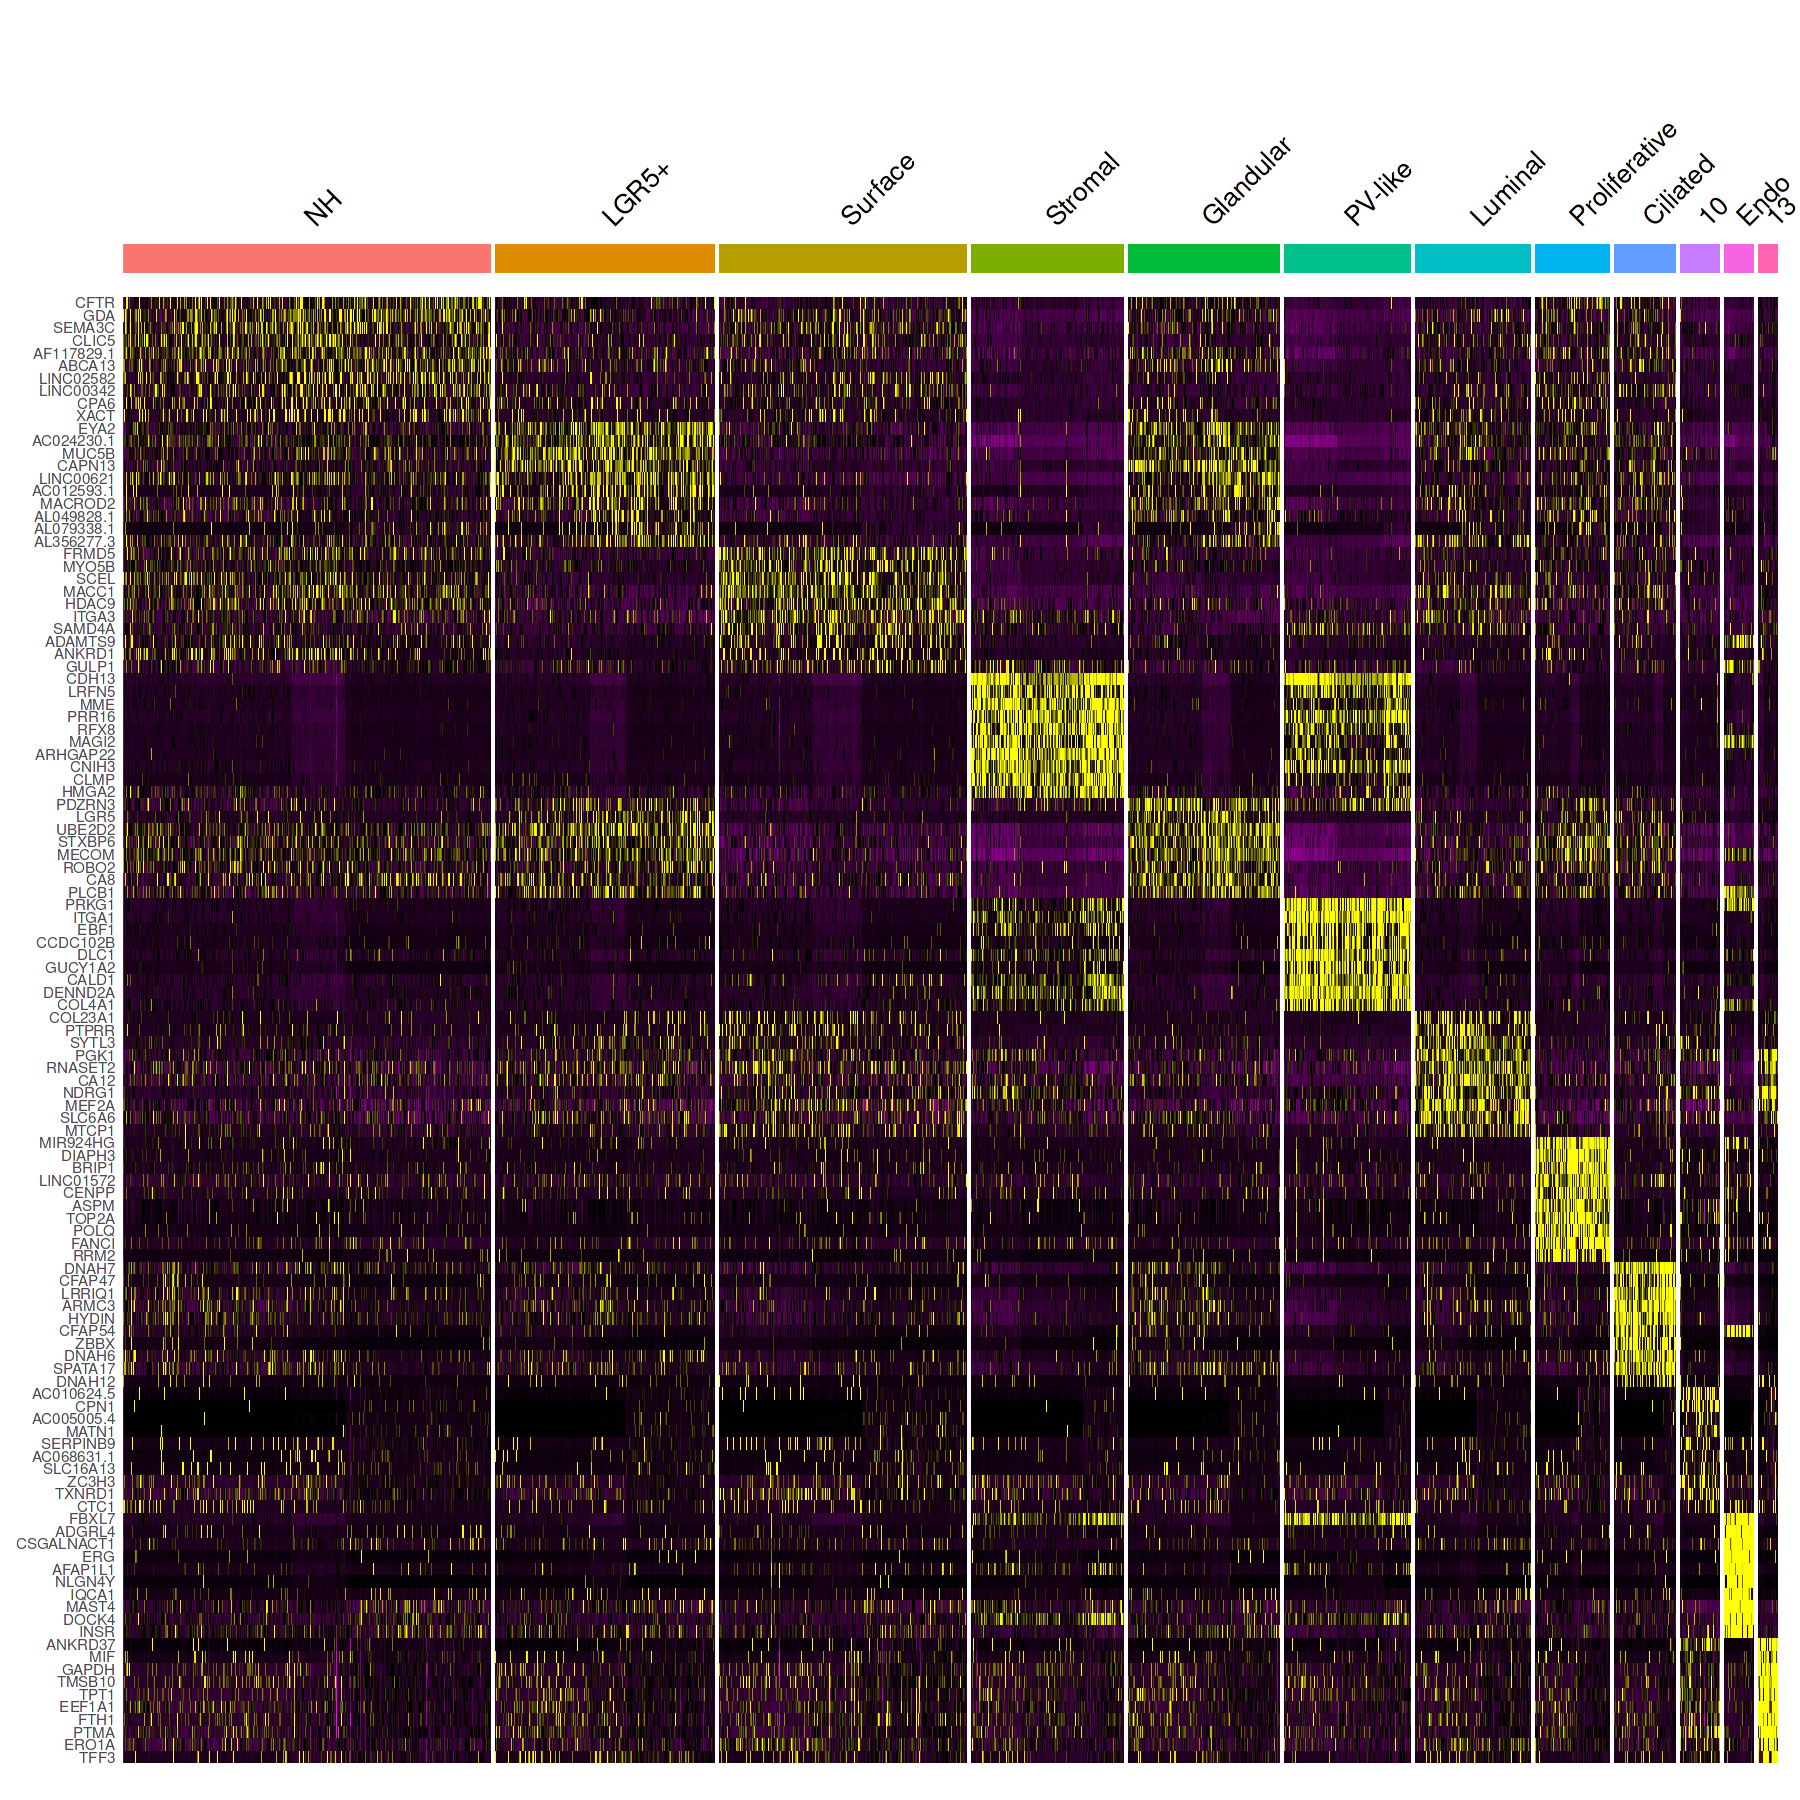

In [96]:
ari.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10

plot.width = 15
plot.height = 15
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DoHeatmap(ari_org_integrated, features = top10$gene) + NoLegend()
ggsave(file="results/2023-04-28/FigS4_C.pdf", width = plot.width, height = plot.height) 

## FigureS4_D

In [94]:
# Code to generate clusterProfiler for all clusters together
convertID <- function(list_symbols){
    convertedIDs <- bitr(list_symbols,
                         fromType = "SYMBOL",
                         toType = "ENTREZID",
                         OrgDb = "org.Hs.eg.db",
                         drop = TRUE)
    return(convertedIDs$ENTREZID)
    }

df <- top200[,7:6]
dfsample <- split(df$gene,df$cluster)
length(dfsample)

df2 <- lapply(dfsample, convertID)

[1] 12

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [95]:
GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Hs.eg.db")

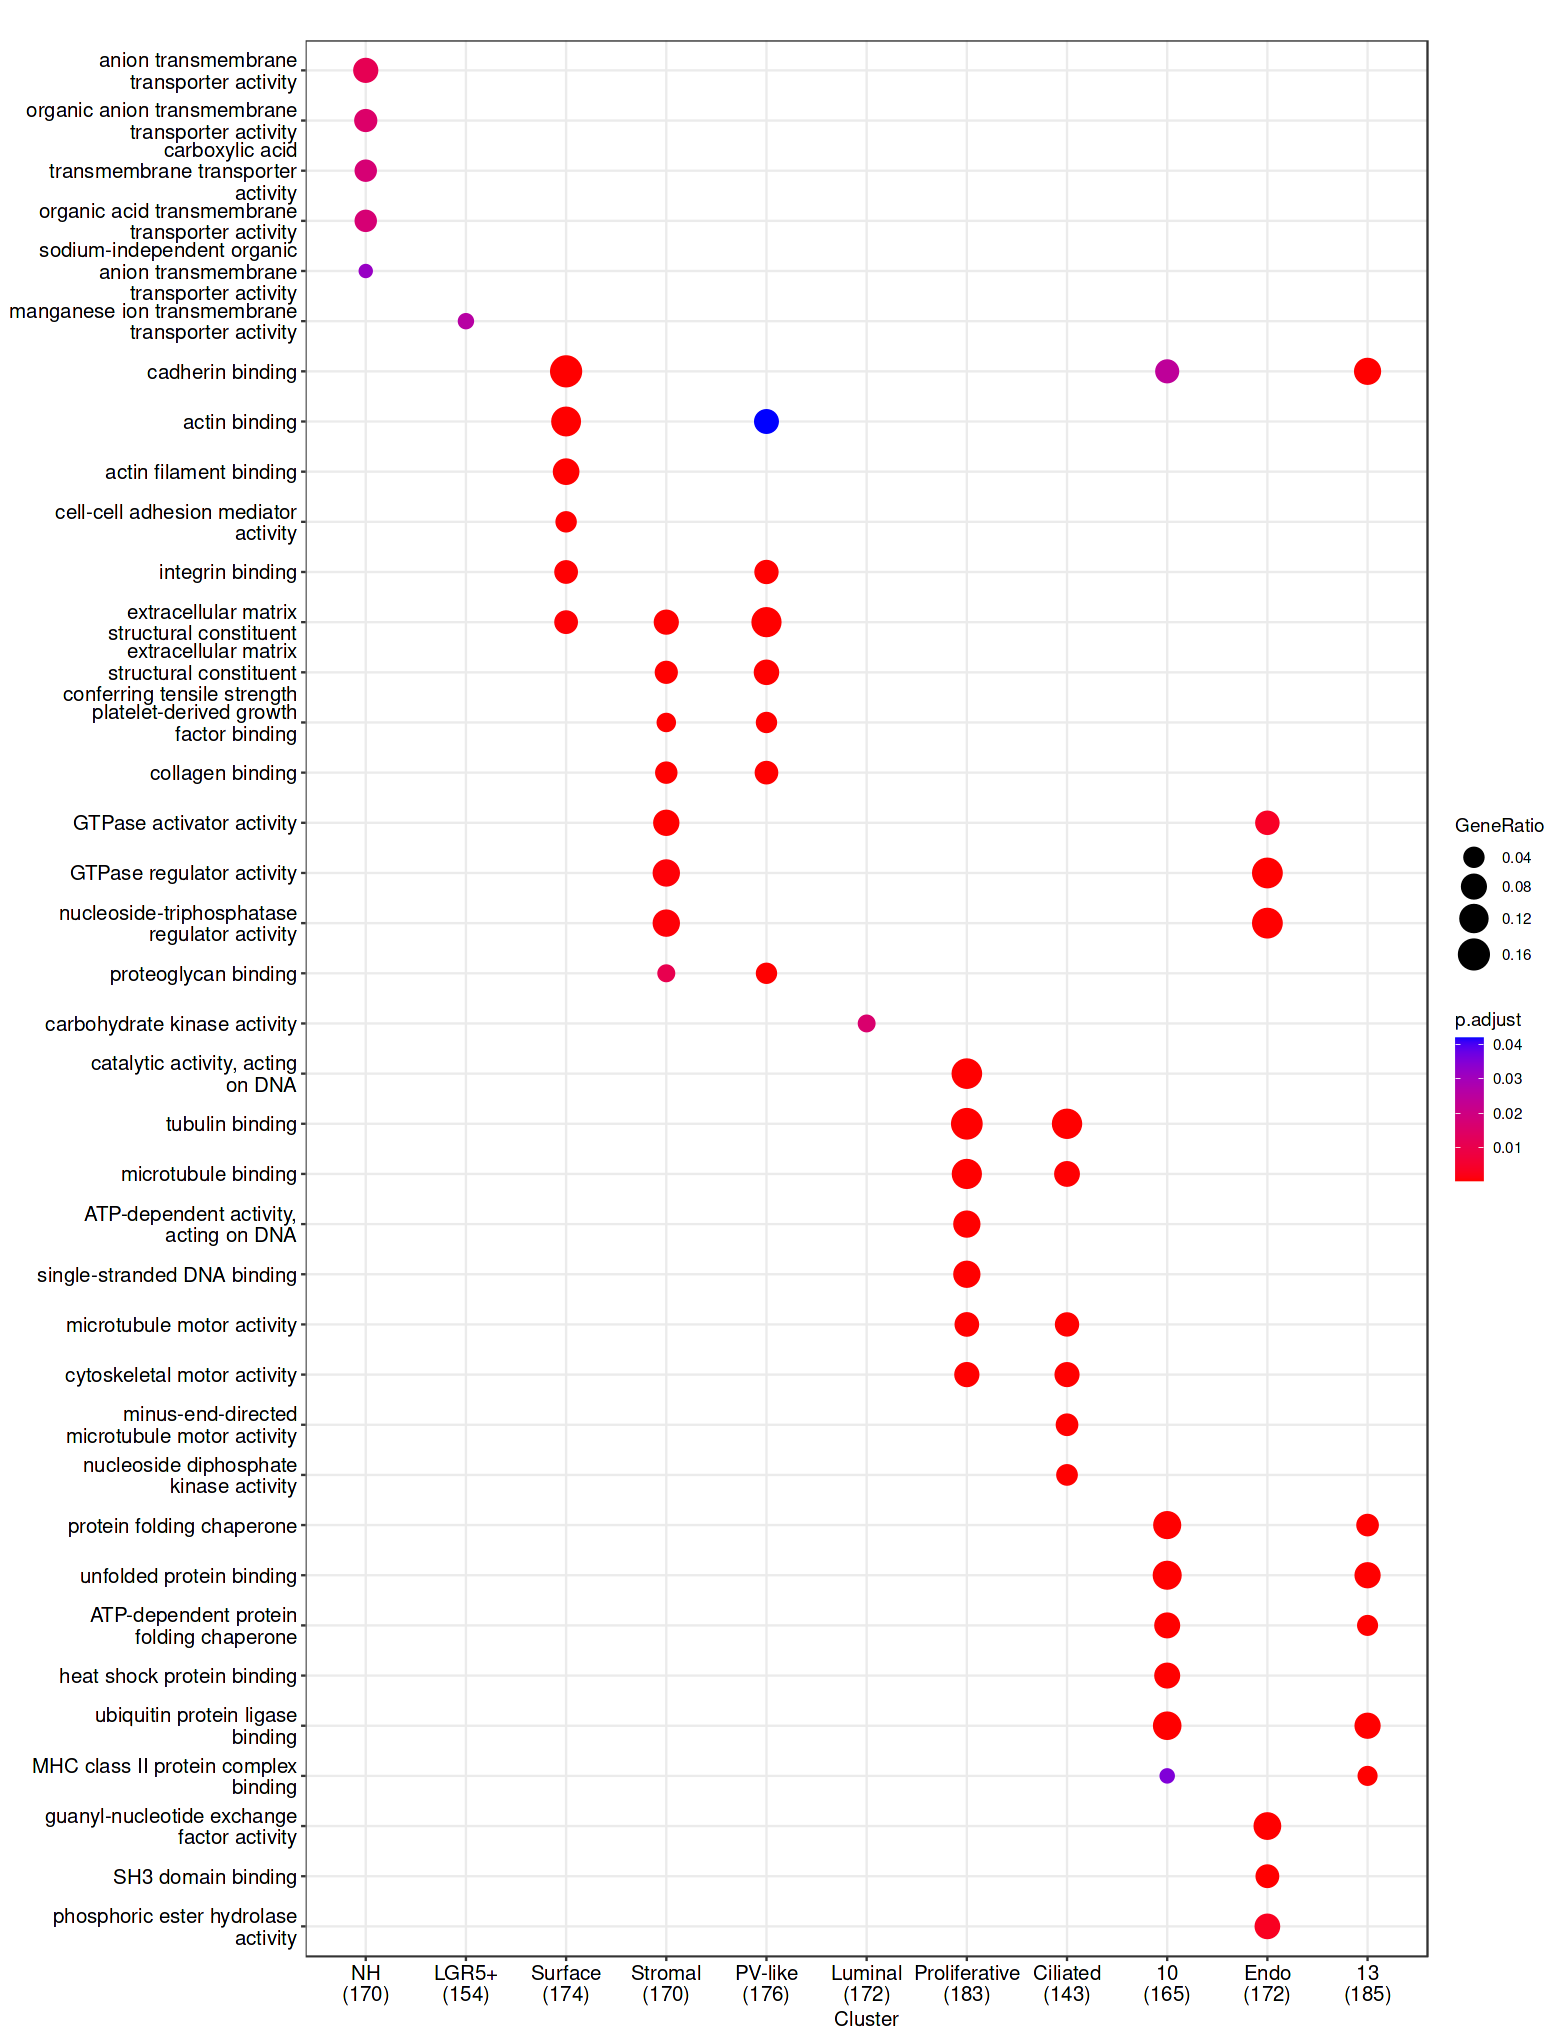

In [107]:
plot.width = 13
plot.height = 17
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
dotplot(GOclusterplot,
        font.size = 12,
        label_format = 30,)
ggsave(file="results/2023-04-28/FigS4_D.pdf", width = plot.width, height = plot.height) 

## DEG list

In [109]:
# save DEG list
write.table(as.matrix(ari.markers), 
            'results/2023-04-28/DEGs_ari_org_clusters.tsv', 
            sep = '\t', row.names = F, col.names = T, quote = F)

## Extra figures

In [4]:
ari_org_integrated <- readRDS("data/ari_org/ari_org_annotated.rds")

In [6]:
final_color_palette <- c('#1B9E77','#D95F02','#7570B3',
                         '#E7298A','#66A61E','#E6AB02',
                         '#A6761D','#666666','#A6CEE3',
                         '#1F78B4','#B2DF8A','#33A02C',
                         '#FB9A99','#E31A1C','#FDBF6F',
                         '#FF7F00','#CAB2D6','#6A3D9A',
                         '#FFFF99','#B15928')

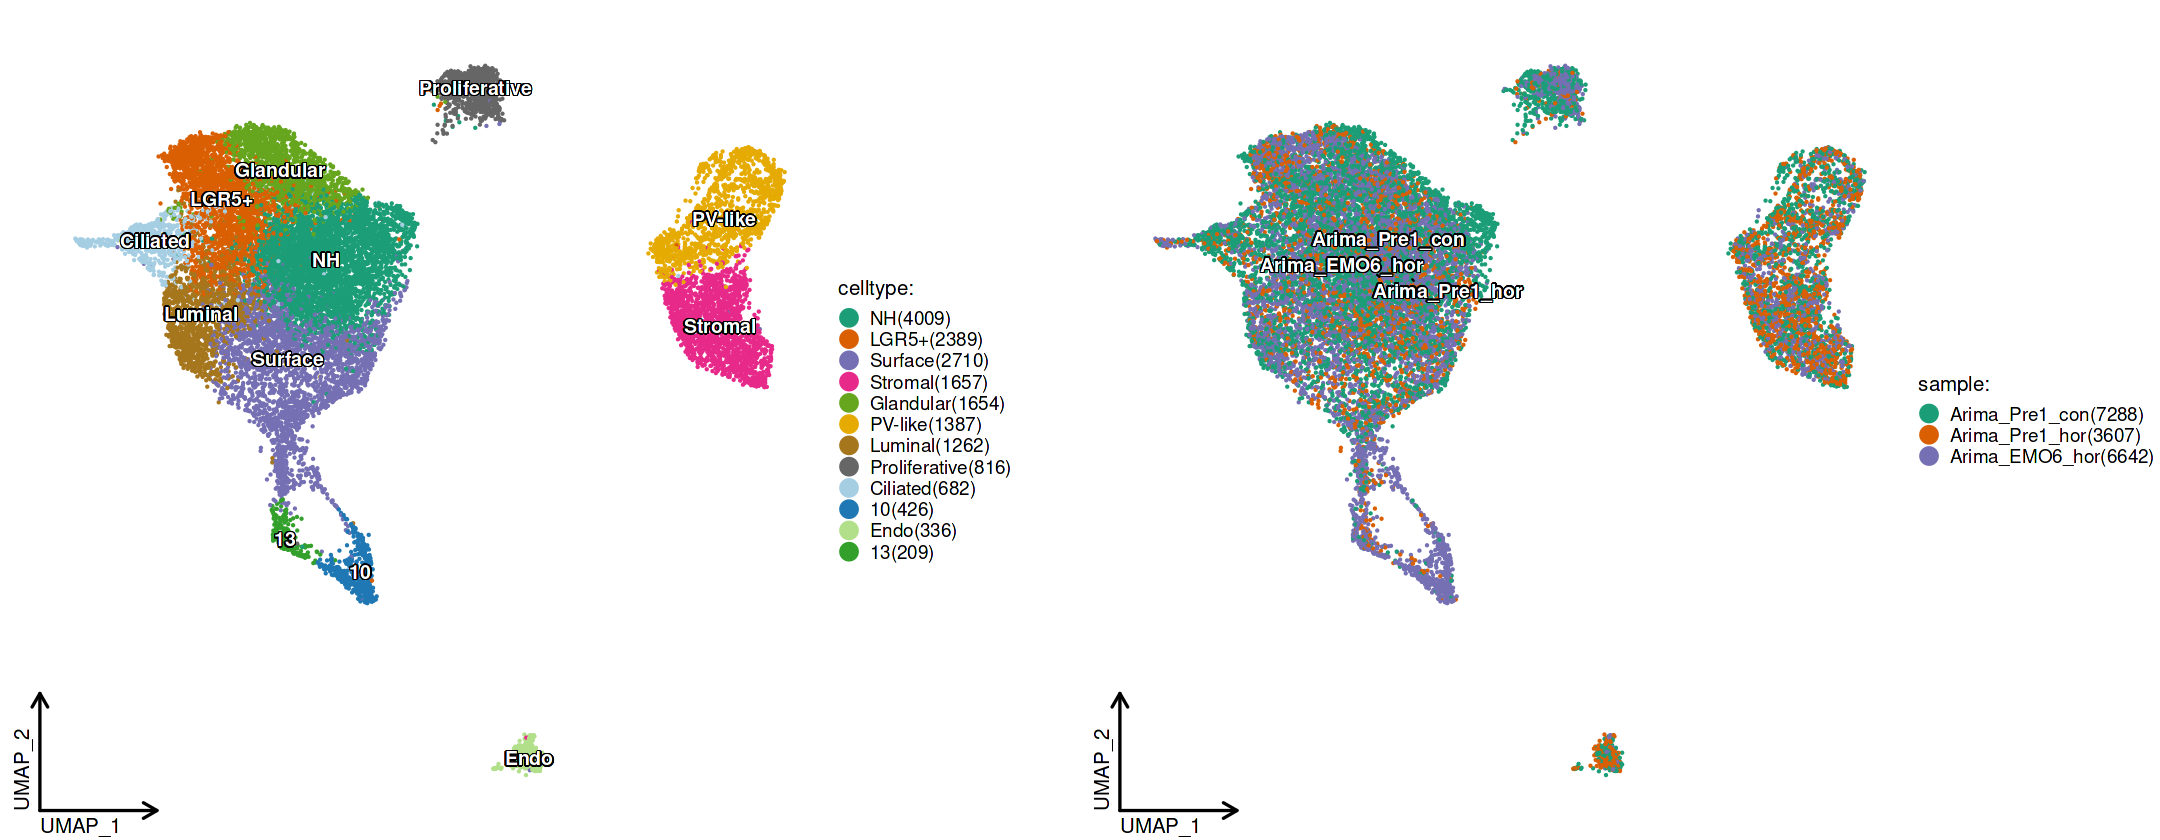

In [7]:
# Using SCP
plot.width = 18
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
ClassDimPlot(label_insitu = TRUE, label = TRUE, 
  srt = ari_org_integrated, group.by = c("celltype", "sample"),
  reduction = "UMAP", theme_use = "theme_blank", palcolor = final_color_palette
)

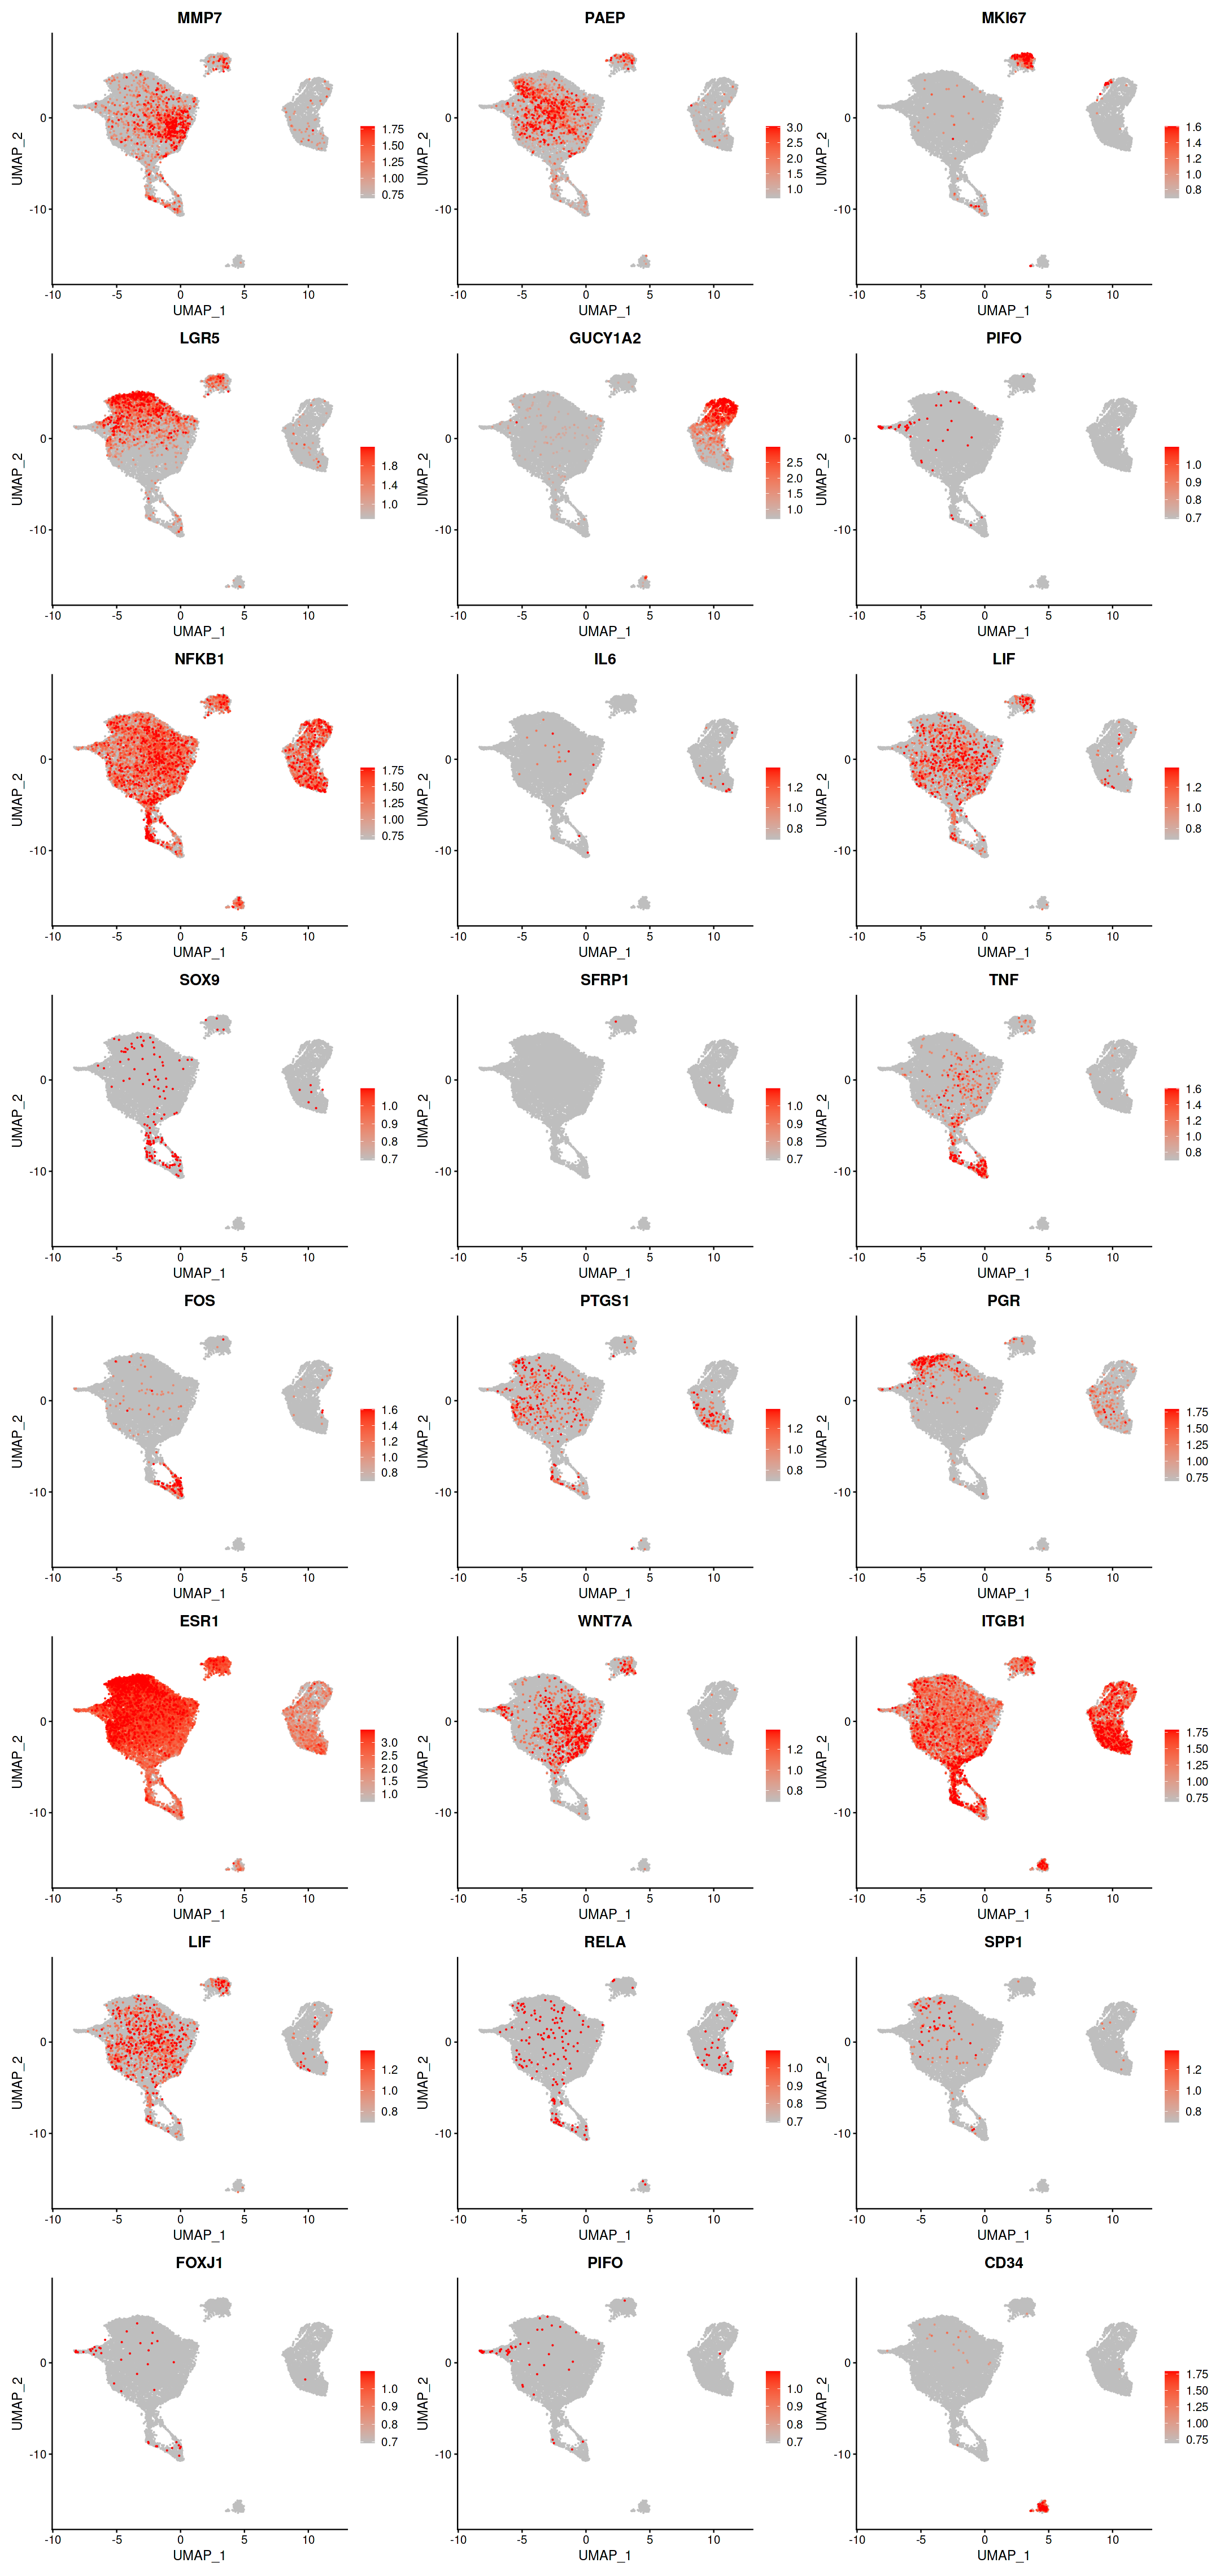

In [13]:
# markers to plot
markers1 = c("MMP7", "PAEP", "MKI67","LGR5", "GUCY1A2", 
             "PIFO","NFKB1", "IL6", "LIF", "SOX9", 
             "SFRP1", "TNF", "FOS","PTGS1", "PGR", 
             "ESR1", "WNT7A", "ITGB1","LIF", 
             "RELA", "SPP1", "FOXJ1", "PIFO", "CD34")

plot.width = 18
plot.height = 38
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
FeaturePlot(ari_org_integrated, features = markers1, order = TRUE, 
            min.cutoff = 'q5', max.cutoff = 'q95', ncol = 3, cols = c("low" = "grey", "high" = "red"))
ggsave(file="results/2023-05-08/ari_org_umap_markers1_shibata.pdf", width = plot.width, height = plot.height)

In [108]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] AnnotationHub_3.6.0   BiocFileCache_2.6.0   dbplyr_2.3.0         
 [4] org.Hs.eg.db_3.16.0   AnnotationDbi_1.60.0  IRanges_2.32.0       
 [7] S4Vectors_0.36.1      Biobase_2.58.0        BiocGenerics_0.44.0  
[10] clusterProfiler_4.6.0 dittoSeq_1.10.0       RColorBrewer_1.1-3   
[13] dplyr_